# 📝 Ejercicio N°4

La siguiente tabla resume la evolución de la población total argentina desde 1960 hasta la actualidad, según los censos nacionales de población (fuente: **INDEC**):

| Año  | Población total |
|------|----------------|
| 1960 | 20,013,793     |
| 1970 | 23,364,431     |
| 1978 | *¿?*          |
| 1980 | 27,949,780     |
| 1986 | *¿?*          |
| 1991 | 32,615,528     |
| 2001 | 36,260,130     |
| 2010 | 40,117,096     |
| 2014 | *¿?*          |
| 2022 | 46,044,703     |

🔢 **Instrucción:**  
Utilizando una **interpolación lineal**, complete la información sobre *Población total* para aquellos años en los que no se cuenta con datos de censos nacionales.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "Año": [1960, 1970, 1978, 1980, 1986, 1991, 2001, 2010, 2014, 2022],
    "Población": ["20,013,793", "23,364,431", "", "27,949,780", "", "32,615,528", "36,260,130", "40,117,096", "", "46,044,703"]
})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Año        10 non-null     int64 
 1   Población  10 non-null     object
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


In [ ]:
def acondicionamiento_poblacion(fila):
  if fila == "":
    return float('nan')

  sincomas = fila.replace(",","")
  return float(sincomas)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Año        10 non-null     int64 
 1   Población  10 non-null     object
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


In [ ]:
df["Población"] = df["Población"].apply(acondicionamiento_poblacion)

In [ ]:
df

,Año,Población
0,1960,20013793.0
1,1970,23364431.0
2,1978,NaN
3,1980,27949780.0
4,1986,NaN
5,1991,32615528.0
6,2001,36260130.0
7,2010,40117096.0
8,2014,NaN
9,2022,46044703.0


In [ ]:
df["Población_interp"] = df["Población"].interpolate(method="linear")
df

,Año,Población
0,1960,20013793.0
1,1970,23364431.0
2,1978,NaN
3,1980,27949780.0
4,1986,NaN
5,1991,32615528.0
6,2001,36260130.0
7,2010,40117096.0
8,2014,NaN
9,2022,46044703.0


In [ ]:
def interp_lineal_censo(df):
  for i in range(len(df) - 1):
    if pd.isna(df.loc[i, "Población"]):
      x_val = df.loc[i, "Año"]
      x1 = df.loc[i - 1, "Año"]
      y1 = df.loc[i - 1, "Población"]
      x2 = df.loc[i + 1, "Año"]
      y2 = df.loc[i + 1, "Población"]
      if x1 <= x_val <= x2:
        y_val = y1 + (y2 - y1) * (x_val - x1) / (x2 - x1)
      df.loc[i, "Población"] = y_val
      print("Año de ", x_val, "interpolado linealmente a ", y_val)


In [ ]:
interp_lineal_censo(df)

Año de  1978 interpolado linealmente a  27032710.2
Año de  1986 interpolado linealmente a  30494733.454545453
Año de  2014 interpolado linealmente a  42092965.0


In [ ]:
df

,Año,Población
0,1960,2.001379e+07
1,1970,2.336443e+07
2,1978,2.703271e+07
3,1980,2.794978e+07
4,1986,3.049473e+07
5,1991,3.261553e+07
6,2001,3.626013e+07
7,2010,4.011710e+07
8,2014,4.209296e+07
9,2022,4.604470e+07


In [ ]:
df

,Año,Población
0,1960,2.001379e+07
1,1970,2.336443e+07
2,1978,2.703271e+07
3,1980,2.794978e+07
4,1986,3.049473e+07
5,1991,3.261553e+07
6,2001,3.626013e+07
7,2010,4.011710e+07
8,2014,4.209296e+07
9,2022,4.604470e+07


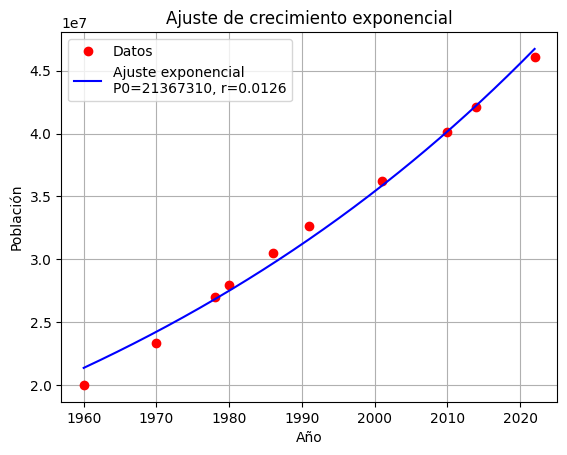